In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("RegressionData.xls")

In [3]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp
0,Male,43,15,Manager,57000,27000,98,144
1,Male,37,16,Clerical,40200,18750,98,36
2,Female,66,12,Clerical,21450,12000,98,381
3,Female,48,8,Clerical,21900,13200,98,190
4,Male,40,15,Clerical,45000,21000,98,138


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,474.0,38.675105,11.771788,24.0,30.00,33.5,47.00,66.0
educ,474.0,13.491561,2.884846,8.0,12.00,12.0,15.00,21.0
salary,474.0,34419.567511,17075.661465,15750.0,24000.00,28875.0,36937.50,135000.0
salbegin,474.0,17016.086498,7870.638154,9000.0,12487.50,15000.0,17490.00,79980.0
jobtime,474.0,81.109705,10.060945,63.0,72.00,81.0,90.00,98.0
prevexp,474.0,95.886076,104.564433,0.0,19.25,55.0,138.75,476.0


In [5]:
import statsmodels.api as sm

In [6]:
X = data[["educ"]]

In [7]:
X = sm.add_constant(X)

In [8]:
y = data["salary"]

In [9]:
lm = sm.OLS(y,X)

In [10]:
model = lm.fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     365.4
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           9.64e-61
Time:                        15:03:55   Log-Likelihood:                -5155.5
No. Observations:                 474   AIC:                         1.032e+04
Df Residuals:                     472   BIC:                         1.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.833e+04   2821.912     -6.496      0.000   -2.39e+04   -1.28e+04
educ        3909.9067    204.547     19.115      0.000    3507.971    4311.842
==============================================================================
Omnibus:                      192.432   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.498
Skew:                           1.759   Prob(JB):                    2.59e-194
Kurtosis:                       8.724   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = data.loc[:,["educ","jobtime"]]

y = data["salary"]  
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     184.4
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           7.19e-60
Time:                        15:04:11   Log-Likelihood:                -5154.4
No. Observations:                 474   AIC:                         1.031e+04
Df Residuals:                     471   BIC:                         1.033e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.542e+04   5415.865     -4.693      0.000   -3.61e+04   -1.48e+04
educ        3895.0674    204.486     19.048      0.000    3493.250    4296.884
jobtime       89.8078     58.634      1.532      0.126     -25.408     205.024
==============================================================================
Omnibus:                      189.700   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              855.436
Skew:                           1.741   Prob(JB):                    1.76e-186
Kurtosis:                       8.585   Cond. No.                         762.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
data["male"]=np.where(data["gender"].str.contains("Male"), 1, 0) 

In [14]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,male
0,Male,43,15,Manager,57000,27000,98,144,1
1,Male,37,16,Clerical,40200,18750,98,36,1
2,Female,66,12,Clerical,21450,12000,98,381,0
3,Female,48,8,Clerical,21900,13200,98,190,0
4,Male,40,15,Clerical,45000,21000,98,138,1


In [15]:
data["man"]=np.where(data["jobcat"]=="Manager",1,0)

In [16]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,male,man
0,Male,43,15,Manager,57000,27000,98,144,1,1
1,Male,37,16,Clerical,40200,18750,98,36,1,0
2,Female,66,12,Clerical,21450,12000,98,381,0,0
3,Female,48,8,Clerical,21900,13200,98,190,0,0
4,Male,40,15,Clerical,45000,21000,98,138,1,0


In [17]:
data["cler"]=np.where(data["jobcat"].str.contains("Clerical"), 1, 0)    

In [18]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,male,man,cler
0,Male,43,15,Manager,57000,27000,98,144,1,1,0
1,Male,37,16,Clerical,40200,18750,98,36,1,0,1
2,Female,66,12,Clerical,21450,12000,98,381,0,0,1
3,Female,48,8,Clerical,21900,13200,98,190,0,0,1
4,Male,40,15,Clerical,45000,21000,98,138,1,0,1


In [19]:
data.jobcat.unique()

array(['Manager', 'Clerical', 'Custodial'], dtype=object)

In [20]:
X = data.loc[:,["educ","jobtime","male","man","cler",]]
y = data["salary"]
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     249.7
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          1.39e-129
Time:                        15:04:27   Log-Likelihood:                -4983.4
No. Observations:                 474   AIC:                             9979.
Df Residuals:                     468   BIC:                         1.000e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2391.6380   4125.103      0.580      0.562   -5714.378    1.05e+04
educ        1467.7988    196.727      7.461      0.000    1081.222    1854.376
jobtime      102.3110     41.102      2.489      0.013      21.543     183.079
male        5253.4197    956.650      5.491      0.000    3373.559    7133.281
man         2.334e+04   2445.033      9.544      0.000    1.85e+04    2.81e+04
cler       -4006.4871   1987.609     -2.016      0.044   -7912.230    -100.744
==============================================================================
Omnibus:                      250.037   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2645.453
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      13.826   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = data.loc[:,["educ","jobtime","male","man","cler","age","salbegin","prevexp"]]
y = data["salary"]
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     314.0
Date:                Tue, 28 Sep 2021   Prob (F-statistic):          4.31e-182
Time:                        15:04:43   Log-Likelihood:                -4851.4
No. Observations:                 474   AIC:                             9721.
Df Residuals:                     465   BIC:                             9758.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4217   3598.831     -0.001      0.999   -7074.408    7069.564
educ         477.0160    160.590      2.970      0.003     161.444     792.588
jobtime      153.8804     31.528      4.881      0.000      91.926     215.835
male        1568.6068    789.186      1.988      0.047      17.794    3119.419
man         4815.7000   2168.657      2.221      0.027     554.118    9077.282
cler       -6525.8845   1634.888     -3.992      0.000   -9738.567   -3313.202
age          -67.0841     47.734     -1.405      0.161    -160.886      26.718
salbegin       1.3468      0.073     18.466      0.000       1.203       1.490
prevexp      -15.9227      5.769     -2.760      0.006     -27.259      -4.587
==============================================================================
Omnibus:                      216.111   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2051.633
Skew:                           1.726   Prob(JB):                         0.00
Kurtosis:                      12.589   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
for i in range(len(X.columns))] 
print(vif_data)

    feature         VIF
0     const  132.523433
1      educ    2.191472
2   jobtime    1.027345
3      male    1.580685
4       man    7.016797
5      cler    4.904769
6       age    3.224022
7  salbegin    3.364348
8   prevexp    3.715276


In [28]:
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
white_test = het_white(model.resid,  model.model.exog)
print(white_test)

(72.73902837491657, 0.000838988550374135, 2.0172777464605143, 0.0004274383587426675)


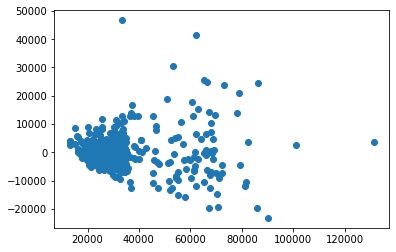

In [31]:
import matplotlib.pyplot as plt
x=model.fittedvalues #y_hat
y=model.resid
plt.scatter(x,y)

In [34]:
X = data.loc[:,["educ","jobtime","male","man","cler"]]
y = data["salary"]
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          1.39e-129
Time:                        16:44:51   Log-Likelihood:                -4983.4
No. Observations:                 474   AIC:                             9979.
Df Residuals:                     468   BIC:                         1.000e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2391.6380   4125.103      0.580      0.562   -5714.378    1.05e+04
educ        1467.7988    196.727      7.461      0.000    1081.222    1854.376
jobtime      102.3110     41.102      2.489      0.013      21.543     183.079
male        5253.4197    956.650      5.491      0.000    3373.559    7133.281
man         2.334e+04   2445.033      9.544      0.000    1.85e+04    2.81e+04
cler       -4006.4871   1987.609     -2.016      0.044   -7912.230    -100.744
==============================================================================
Omnibus:                      250.037   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2645.453
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      13.826   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = data.loc[:,["educ","jobtime","male","man","cler"]]
y = np.log(data["salary"])
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          5.46e-142
Time:                        16:44:53   Log-Likelihood:                 102.45
No. Observations:                 474   AIC:                            -192.9
Df Residuals:                     468   BIC:                            -167.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5257      0.090    105.500      0.000       9.348       9.703
educ           0.0440      0.004     10.214      0.000       0.036       0.052
jobtime        0.0024      0.001      2.676      0.008       0.001       0.004
male           0.1675      0.021      7.998      0.000       0.126       0.209
man            0.4024      0.054      7.518      0.000       0.297       0.508
cler          -0.1567      0.044     -3.601      0.000      -0.242      -0.071
==============================================================================
Omnibus:                       34.924   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.826
Skew:                           0.571   Prob(JB):                     4.12e-11
Kurtosis:                       4.056   Cond. No.                         845.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modeli maaş log alarak yaptığımda heteroskedastisity azaldı, daha düz bir değişim gördük

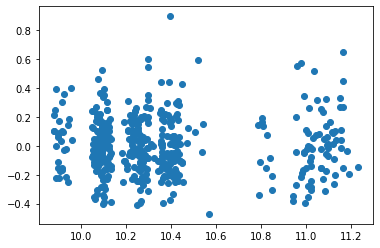

In [36]:
import matplotlib.pyplot as plt
x=model.fittedvalues #y_hat
y=model.resid
plt.scatter(x,y)

VIF değeri, korelasyon ölçer ama dummy değişkenler için korelasyon ölçmek anlamsızdı, yani aşağıdaki man 5.14 çıkması bizim için önemli değil

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
for i in range(len(X.columns))] 
print(vif_data)

   feature         VIF
0    const  100.400288
1     educ    1.896359
2  jobtime    1.006830
3     male    1.339332
4      man    5.143064
5     cler    4.180232


LOGIT LOGIT LOGIT

In [4]:
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')


In [5]:
data=pd.read_excel("LogitData.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:
data.head()

,admit,gre,topnotch,gpa
0,0,380,0,3.61
1,1,660,1,3.67
2,1,800,1,4.00
3,1,640,0,3.19
4,0,520,0,2.93


In [7]:
y=data["admit"]
X=data.loc[:,["gre","topnotch","gpa"]]
X= sm.add_constant(X)
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()


Optimization terminated successfully.
         Current function value: 0.597662
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sat, 31 Oct 2020   Pseudo R-squ.:                 0.04370
Time:                        17:11:17   Log-Likelihood:                -239.06
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.019e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6008      1.096     -4.196      0.000      -6.750      -2.452
gre            0.0025      0.001      2.314      0.021       0.000       0.005
topnotch       0.4372      0.292      1.498      0.134      -0.135       1.009
gpa            0.6676      0.325      2.052      0.040       0.030       1.305
==============================================================================
"""

In [9]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model= loj.fit(X,y)
loj_model
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)
accuracy_score(y, y_pred)
print(classification_report(y, y_pred))

y_probs = loj_model.predict_proba(X)


              precision    recall  f1-score   support

           0       0.69      0.97      0.81       273
           1       0.53      0.07      0.12       127

    accuracy                           0.69       400
   macro avg       0.61      0.52      0.47       400
weighted avg       0.64      0.69      0.59       400



CLUSTER CLUSTER CLUSTER

In [13]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans


In [10]:
data=pd.read_excel("ClusterData.xls")

In [11]:
data.head()

,Countries,RD,TechIndex,EduIndex
0,Austria,1.94,4.85,0.993
1,Bulgaria,0.59,3.82,0.930
2,Cyprus,0.31,4.36,0.910
3,Czech Re,1.20,4.88,0.938
4,Denmark,2.20,5.34,0.993


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RD,23.0,1.333478,0.890677,0.310,0.610,1.060,1.9050,3.600
TechIndex,23.0,4.697826,0.521971,3.820,4.390,4.670,4.9000,5.920
EduIndex,23.0,0.954783,0.037340,0.828,0.934,0.965,0.9795,0.993


In [25]:
data.index=data.iloc[:,0]              
data=data.iloc[:,1:4]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans
k_fit = kmeans.fit(data)
k_fit.labels_
pd.DataFrame({"Ulkeler" : data.index, "Kumeler": kumeler})


ValueError: at least one array or dtype is required

In [16]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")
hc_ward=linkage(data,"ward")


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [103.75, 103.75, 140.0, 140.0],
  [80.0, 80.0, 121.875, 121.875],
  [28.125, 28.125, 100.9375, 100.9375],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [160.0, 160.0, 191.875, 191.875],
  [64.53125, 64.53125, 175.9375, 175.9375]],
 'dcoord': [[0.0, 0.11475626344561751, 0.11475626344561751, 0.0],
  [0.0, 0.3403880138900308, 0.3403880138900308, 0.11475626344561751],
  [0.0, 0.16391766225761042, 0.16391766225761042, 0.0],
  [0.0, 0.2543147655957086, 0.2543147655957086, 0.16391766225761042],
  [0.0, 0.3711926723414

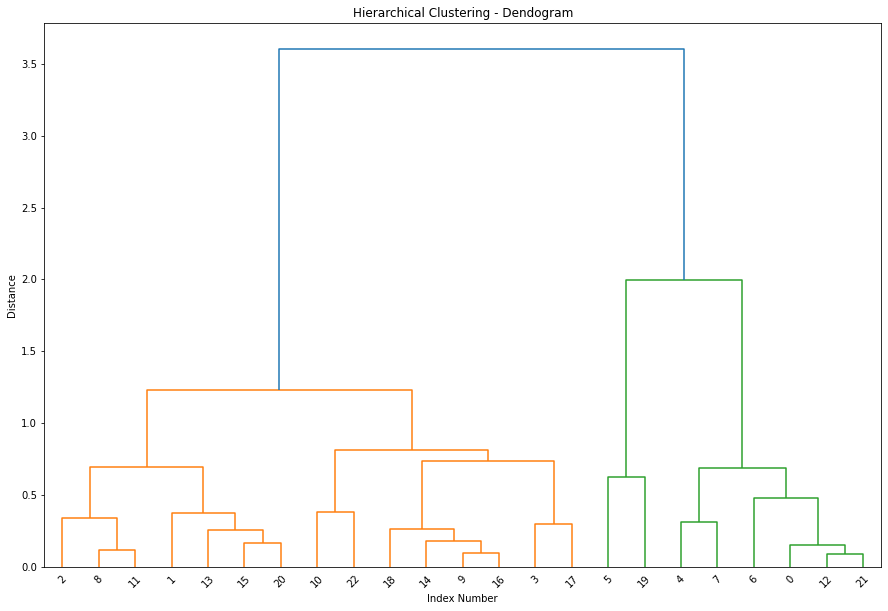

In [18]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(hc_complete,leaf_font_size=10)


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [115.0, 115.0, 141.25, 141.25],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [128.125, 128.125, 183.75, 183.75],
  [105.0, 105.0, 155.9375, 155.9375],
  [95.0, 95.0, 130.46875, 130.46875],
  [85.0, 85.0, 112.734375, 112.734375],
  [75.0, 75.0, 98.8671875, 98.8671875],
  [65.0, 65.0, 86.93359375, 86.93359375],
  [33.75, 33.75, 75.966796875, 75.966796875],
  [10.0, 10.0, 54.8583984375, 54.8583984375],
  [215.0, 215.0, 225.0, 225.0],
  [32.42919921875, 32.42919921875, 220.0, 220.0]],
 'dcoord': [[0.0, 0.313083056072985, 0.313083056072985, 0.0],
  [0.0, 0.08935323161475509, 0.08935323161475509, 0.0],
  [0.0, 0.1478648031141968, 0.1478648031141968, 0.08935323161475509],
  [0.0, 0.3283671725370

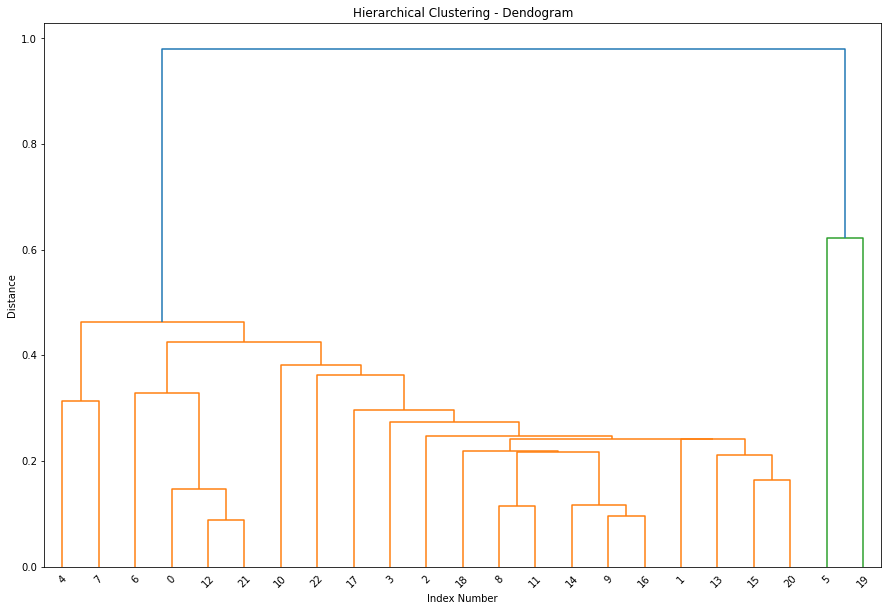

In [19]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(hc_single,leaf_font_size=10)



{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [30.0, 30.0, 53.75, 53.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [92.5, 92.5, 123.75, 123.75],
  [155.0, 155.0, 165.0, 165.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [215.0, 215.0, 225.0, 225.0],
  [183.75, 183.75, 220.0, 220.0],
  [160.0, 160.0, 201.875, 201.875],
  [108.125, 108.125, 180.9375, 180.9375],
  [41.875, 41.875, 144.53125, 144.53125],
  [10.0, 10.0, 93.203125, 93.203125]],
 'dcoord': [[0.0, 0.621981510979225, 0.621981510979225, 0.0],
  [0.0, 0.313083056072985, 0.313083056072985, 0.0],
  [0.0, 0.08935323161475509, 0.08935323161475509, 0.0],
  [0.0, 0.14991924252314992, 0.14991924252314992, 0.08935323161475509],
  [0.0, 0.4233054729249637, 0.423305472

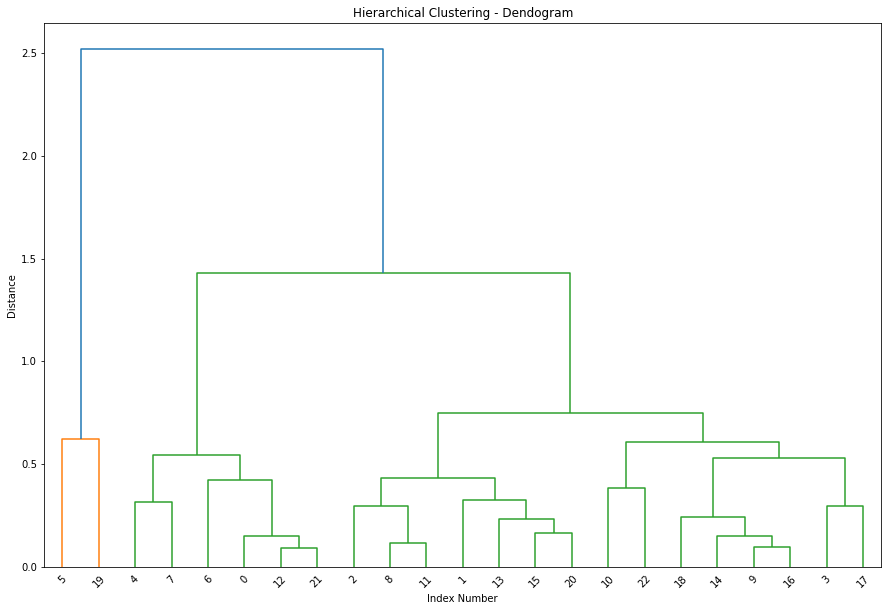

In [20]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(hc_average,leaf_font_size=10)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [96.25, 96.25, 132.5, 132.5],
  [28.125, 28.125, 114.375, 114.375],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [160.0, 160.0, 191.875, 191.875],
  [71.25, 71.25, 175.9375, 175.9375]],
 'dcoord': [[0.0, 0.11475626344561751, 0.11475626344561751, 0.0],
  [0.0, 0.3374616027540514, 0.3374616027540514, 0.11475626344561751],
  [0.0, 0.16391766225761042, 0.16391766225761042, 0.0],
  [0.0, 0.25325941904168836, 0.25325941904168836, 0.16391766225761042],
  [0.0, 0.37390395379919006, 0.373903

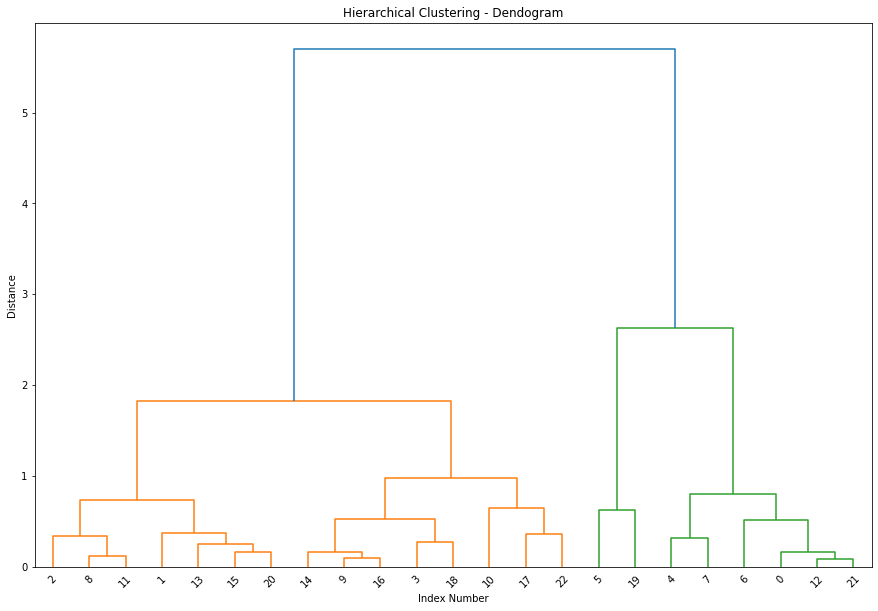

In [21]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(hc_ward,leaf_font_size=10)

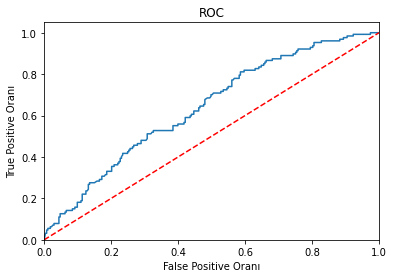

In [23]:
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
